In [1]:
import sys
sys.path.insert(0, "/home/des01/vitiello/ftaraujo/miniconda3/lib/python3.7/site-packages")
import ROOT

Welcome to JupyROOT 6.18/04


In [2]:
c1 = ROOT.TCanvas()

--> 0th order:
p0: 0.05139313662590017
--> 1st order:
p0: 0.028691482419404002
p1: 1.0369299018891338
--> 2nd order:
p0: 0.06293247233776278
p1: 0.798908993882399
p2: 1.839832400067859
--> 3rd order:
p0: 0.24862822880970248
p1: 0.009014174670244901
p2: 3.183109288902081
p3: 2.4238492253416744
--> 4th order:
p0: 0.35793105102334855
p1: 7.423515691051819e-08
p2: 3.0037476560493936
p3: 3.5717828960408142
p4: 3.854433260464182
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const

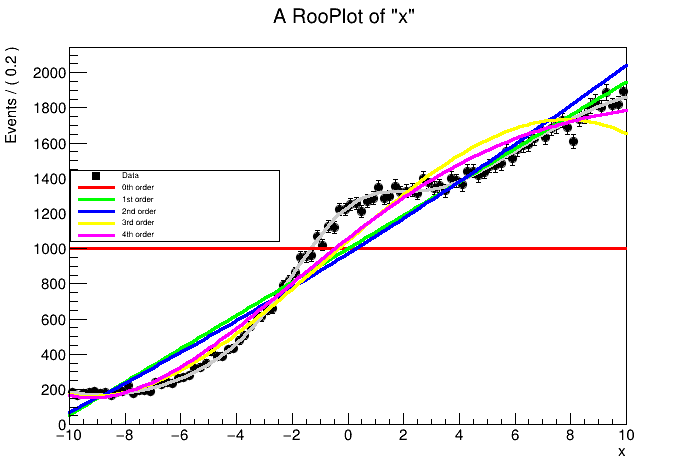

In [9]:
x = ROOT.RooRealVar("x","x",-10,10)
p0_ = ROOT.RooRealVar("p0_","v",0.5,0,10)
p1_ = ROOT.RooRealVar("p1_","v",1,0,10)
p2_ = ROOT.RooRealVar("p2_","v",0.5,0,10)
p3_ = ROOT.RooRealVar("p3_","v",1,0,10)
p4_ = ROOT.RooRealVar("p4_","v",0.5,0,10)
 
    
# mean = ROOT.RooRealVar("mean","Mean of Gaussian",-10,10)
# sigma = ROOT.RooRealVar("sigma","Width of Gaussian",3,-10,10)

# true_model = ROOT.RooBernstein("true_model","RooBernstein",x,ROOT.RooArgList(p0_,p1_,p2_,p3_))
# true_model = ROOT.RooGaussian("gauss","gauss(x,mean,sigma)",x,mean,sigma)


mean = ROOT.RooRealVar("mean","mean",0,-10,10)
sigma = ROOT.RooRealVar("sigma","sigma",2,0.,10)
sig = ROOT.RooGaussian("sig","signal p.d.f.",x,mean,sigma)

coef0 = ROOT.RooRealVar("c0","coefficient #0",1.0,-1.,1)
coef1 = ROOT.RooRealVar("c1","coefficient #1",0.1,-1.,1)
coef2 = ROOT.RooRealVar("c2","coefficient #2",-0.1,-1.,1)
bkg = ROOT.RooChebychev("bkg","background p.d.f.",x,ROOT.RooArgList(coef0,coef1,coef2))

fsig = ROOT.RooRealVar("fsig","signal fraction",0.1,0.,1.)

# model(x) = fsig*sig(x) + (1-fsig)*bkg(x)
true_model = ROOT.RooAddPdf("model","model",ROOT.RooArgList(sig,bkg),ROOT.RooArgList(fsig))


################################################################
################################################################
################################################################


p0 = ROOT.RooRealVar("p0","v",1,0,10)
p1 = ROOT.RooRealVar("p1","v",1,0,10)
p2 = ROOT.RooRealVar("p2","v",1,0,100)
p3 = ROOT.RooRealVar("p3","v",1,0,10)
p4 = ROOT.RooRealVar("p4","v",1,0,10)

data = true_model.generate(ROOT.RooArgSet(x),100000)

xframe = x.frame()
data.plotOn(xframe, ROOT.RooLinkedList())
true_model.plotOn(xframe,ROOT.RooFit.LineColor(ROOT.kGray))


# leg1 = ROOT.TLegend(0.65,0.73,0.86,0.87);
leg1 = ROOT.TLegend();
# leg1.SetFillColor(ROOT.kWhite);
# leg1.SetLineColor(ROOT.kWhite);
leg1.AddEntry(data,"Data", "P");
# leg1->AddEntry(“model”,“Signal + background”,“LP”);
# leg1->AddEntry(“background”,“Background only”, “LP”);
# leg1->AddEntry(“signal only”,“Signal only”, “LP”);


p0.setVal(1)
p1.setVal(1)
p2.setVal(1)
p3.setVal(1)
p4.setVal(1)
pol_0_order = ROOT.RooBernstein("pol_0_order","RooBernstein",x,ROOT.RooArgList(p0))
pol_0_order_fit = pol_0_order.fitTo(data,ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
nll_0 = pol_0_order_fit.minNll()
pol_0_order.plotOn(xframe,ROOT.RooFit.LineColor(2+0), ROOT.RooFit.Name("pol_0_order"))
leg1.AddEntry(xframe.findObject("pol_0_order"),"0th order", "L");
print("--> 0th order:")
print("p0: "+str(p0.getVal()))

p0.setVal(1)
p1.setVal(1)
p2.setVal(1)
p3.setVal(1)
p4.setVal(1)
pol_1_order = ROOT.RooBernstein("pol_1_order","RooBernstein",x,ROOT.RooArgList(p0,p1))
pol_1_order_fit = pol_1_order.fitTo(data,ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
nll_1 = pol_1_order_fit.minNll()
pol_1_order.plotOn(xframe,ROOT.RooFit.LineColor(2+1), ROOT.RooFit.Name("pol_1_order"))
leg1.AddEntry(xframe.findObject("pol_1_order"),"1st order", "L");
print("--> 1st order:")
print("p0: "+str(p0.getVal()))
print("p1: "+str(p1.getVal()))

p0.setVal(1)
p1.setVal(1)
p2.setVal(1)
p3.setVal(1)
p4.setVal(1)
pol_2_order = ROOT.RooBernstein("pol_2_order","RooBernstein",x,ROOT.RooArgList(p0,p1,p2))
pol_2_order_fit = pol_2_order.fitTo(data,ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
nll_2 = pol_2_order_fit.minNll()
pol_2_order.plotOn(xframe,ROOT.RooFit.LineColor(2+2), ROOT.RooFit.Name("pol_2_order"))
leg1.AddEntry(xframe.findObject("pol_2_order"),"2nd order", "L");
print("--> 2nd order:")
print("p0: "+str(p0.getVal()))
print("p1: "+str(p1.getVal()))
print("p2: "+str(p2.getVal()))

p0.setVal(1)
p1.setVal(1)
p2.setVal(1)
p3.setVal(1)
p4.setVal(1)
pol_3_order = ROOT.RooBernstein("pol_3_order","RooBernstein",x,ROOT.RooArgList(p0,p1,p2,p3))
pol_3_order_fit = pol_3_order.fitTo(data,ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
nll_3 = pol_3_order_fit.minNll()
pol_3_order.plotOn(xframe,ROOT.RooFit.LineColor(2+3), ROOT.RooFit.Name("pol_3_order"))
leg1.AddEntry(xframe.findObject("pol_3_order"),"3rd order", "L");
print("--> 3rd order:")
print("p0: "+str(p0.getVal()))
print("p1: "+str(p1.getVal()))
print("p2: "+str(p2.getVal()))
print("p3: "+str(p3.getVal()))

p0.setVal(1)
p1.setVal(1)
p2.setVal(1)
p3.setVal(1)
p4.setVal(1)
pol_4_order = ROOT.RooBernstein("pol_4_order","RooBernstein",x,ROOT.RooArgList(p0,p1,p2,p3,p4))
pol_4_order_fit = pol_4_order.fitTo(data,ROOT.RooFit.PrintLevel(-1), ROOT.RooFit.Save())
nll_4 = pol_4_order_fit.minNll()
pol_4_order.plotOn(xframe,ROOT.RooFit.LineColor(2+4), ROOT.RooFit.Name("pol_4_order"))
leg1.AddEntry(xframe.findObject("pol_4_order"),"4th order", "L");
print("--> 4th order:")
print("p0: "+str(p0.getVal()))
print("p1: "+str(p1.getVal()))
print("p2: "+str(p2.getVal()))
print("p3: "+str(p3.getVal()))
print("p4: "+str(p4.getVal()))

# data.plotOn(xframe, ROOT.RooLinkedList())
xframe.Draw()
leg1.Draw()
c1.Draw()

In [10]:
delta_01 = 2*(nll_0 - nll_1)
delta_12 = 2*(nll_1 - nll_2)
delta_23 = 2*(nll_2 - nll_3)
delta_34 = 2*(nll_3 - nll_4)

In [11]:
print(delta_01)
print(delta_12)
print(delta_23)
print(delta_34)

36751.13030237891
103.59124810714275
1331.159108696389
165.96120574406814


In [12]:
print("p-value 0-1 = "+str(ROOT.TMath.Prob(delta_01, 1)))
print("p-value 1-2 = "+str(ROOT.TMath.Prob(delta_12, 1)))
print("p-value 2-3 = "+str(ROOT.TMath.Prob(delta_23, 1)))
print("p-value 3-4 = "+str(ROOT.TMath.Prob(delta_34, 1)))

p-value 0-1 = 0.0
p-value 1-2 = 2.4867326322104273e-24
p-value 2-3 = 1.9141312514238566e-291
p-value 3-4 = 5.640794661949332e-38
